In [25]:
import sqlite3
import pandas as pd
import numpy as np

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error

In [27]:
conn = sqlite3.connect('cars_sold.sqlite')

In [28]:
query = 'SELECT * FROM cars_sold'
df = pd.read_sql_query(query, conn)

In [29]:
conn.close()

In [30]:
df.head()

,make,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [7]:
# Define features set
X = df.copy()
X.drop("price", axis=1, inplace=True)
X.head()

,make,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,Audi,A1,2017,Manual,15735,Petrol,150,55.4,1.4
1,Audi,A6,2016,Automatic,36203,Diesel,20,64.2,2.0
2,Audi,A1,2016,Manual,29946,Petrol,30,55.4,1.4
3,Audi,A4,2017,Automatic,25952,Diesel,145,67.3,2.0
4,Audi,A3,2019,Manual,1998,Petrol,145,49.6,1.0


In [8]:
# Define target vector
y = df["price"].ravel()
y[:5]

array([12500, 16500, 11000, 16800, 17300], dtype=int64)

In [9]:
X = pd.get_dummies(X)

In [10]:
# Preview the data
X.head()

,year,mileage,tax,mpg,engineSize,make_Audi,make_Bmw,make_Ford,make_Hyundai,make_Mercedes,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,15735,150,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,2016,36203,20,64.2,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,2016,29946,30,55.4,1.4,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,2017,25952,145,67.3,2.0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,2019,1998,145,49.6,1.0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [11]:
# Split into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [12]:
# Create StandardScaler instance
scaler = StandardScaler()

In [13]:
# Fit Standard Scaler
X_scaler = scaler.fit(X_train)

In [14]:
X_train.head()

,year,mileage,tax,mpg,engineSize,make_Audi,make_Bmw,make_Ford,make_Hyundai,make_Mercedes,...,model_230,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Electric,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
13026,2017,12000,150,36.2,3.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
6152,2019,1962,145,31.4,2.0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
70840,2015,43173,0,76.3,1.3,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
56948,2017,11837,125,56.5,2.1,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
10881,2017,12725,145,68.9,2.0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [15]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [16]:
rfr = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=1)

In [17]:
rfr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, random_state=1)

In [32]:
# R-squared score:

rfr.score(X_test_scaled, y_test)

0.9517602344804599

In [34]:
y_pred = rfr.predict(X_test_scaled) 

print("Predicted Values:", y_pred)
print("Actual Values:", y_test)

Predicted Values: [13121.94217925 14888.51076535 28188.78465069 ...  9298.62265201
  8168.77398791 28552.62747022]
Actual Values: [15999 15299 27950 ...  8506  8299 29000]


In [36]:
df = pd.DataFrame({'Predicted': y_pred, 'Actual': y_test})
df.head(10)

,Predicted,Actual
0,13121.942179,15999
1,14888.510765,15299
2,28188.784651,27950
3,14788.207238,14800
4,7091.048918,6350
5,29383.524275,24950
6,26325.868365,23222
7,9785.802454,9489
8,10639.623337,11232
9,15949.374722,15499


In [31]:
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 4949708.898192193


In [23]:
importances = rfr.feature_importances_
feature_names = X.columns 

# Get indices 
indices = np.argsort(importances)[::-1]

# Get top 10 features
top_10_indices = indices[:10]
top_10_features = feature_names[top_10_indices]
top_10_importances = importances[top_10_indices]

for feature, importance in zip(top_10_features, top_10_importances):
    print(f"Feature: {feature}, Importance: {importance}")

Feature: transmission_Manual, Importance: 0.3119918519458446
Feature: engineSize, Importance: 0.26074460245406694
Feature: year, Importance: 0.25628875984674954
Feature: mpg, Importance: 0.039344269089634454
Feature: mileage, Importance: 0.032138276003408205
Feature: make_Audi, Importance: 0.007947798953967656
Feature: tax, Importance: 0.0073931885853069515
Feature: model_ A Class, Importance: 0.0060564294766299554
Feature: make_Mercedes, Importance: 0.00527910767131106
Feature: make_Vauxhall, Importance: 0.00437900336850112


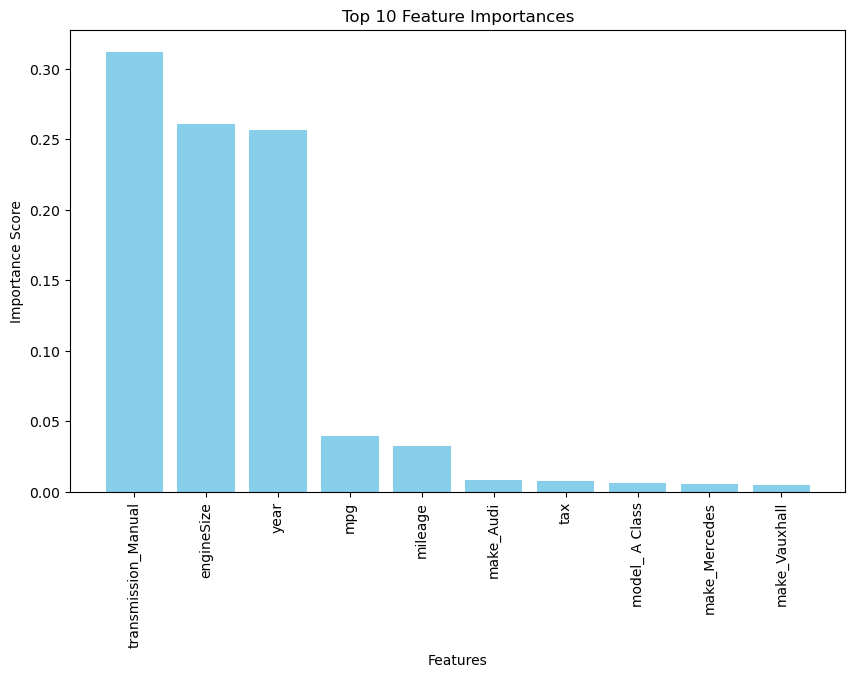

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(top_10_features, top_10_importances, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Top 10 Feature Importances')
plt.xticks(rotation='vertical')
plt.show()